# Assignment 1 (Predictive Analytics with Python)
## Parth Patel, Quang Luong, Tuan Dang (CA2022)
### Part 1: Familiarizing and basic testing of kNN algorithm
#### 1.1 Find some other interesting dataset than the Iris dataset from Kaggle on which you can perform kNN classification
We select the Bank Note Authentication UCI dataset from Kaggle:  
https://www.kaggle.com/datasets/shantanuss/banknote-authentication-uci  
This dataset is in the public domain (licence CC0), and its usability is 10.00 by kaggle calculation. The dataset size is 20 kB.  
![alt text](./bankNoteAuthenticationKaggle.png "Bank Note Authentication - Kaggle")

In [1]:
# first, we import neccessary tools
import numpy as np
import pandas as pd    # for data preparation and exploration...
from sklearn.model_selection import train_test_split, KFold    # for splitting data into training and testing
from sklearn.neighbors import KNeighborsClassifier    # for k nearest neighbours
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score   # for evaluating the models
import matplotlib.pyplot as plt    # for plotting
import seaborn as sns    # for heatmap
import math

After downloading the dataset, we save it in the same working folder with this ipynb file. The file name is BankNoteAuthentication.csv  
* *We read the file with the following code:*

In [2]:
# Get the bankNote dataframe from the csv file
bankNote=pd.read_csv("BankNoteAuthentication.csv", header=[0])

We run some basic commands to understand the dataset  
* *Print out the column names and the value of the first data row*

In [3]:
header = bankNote.iloc[0]
header

variance    3.62160
skewness    8.66610
curtosis   -2.80730
entropy    -0.44699
class       0.00000
Name: 0, dtype: float64

* *Another way to print out the column names and the value of the first data row*

In [4]:
# Display all the variables in the dataset
all_variables = bankNote.columns
all_variables

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

* *Now we display a summary of the dataset*

In [5]:
# Get summary of each column
bankNote.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


*...there are 1372 row of data in the dataset*

* *We check if there is any missing data in the dataset...*

In [6]:
# Check if any missing data
bankNote.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

*...and found no missing data*

* *We realize the first 4 columns are the features...*

In [7]:
# The features are the 4 first columns. We just exclure the last one (class)
features = bankNote.columns[:-1]
features

Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')

*...and the last (5th) column is the target*

In [8]:
# The target is the last column (class)
target = bankNote.columns[-1]
target

'class'

* Now let's review the possible outcomes in the target

In [9]:
outcome_count = bankNote['class'].value_counts()
outcome_count

class
0    762
1    610
Name: count, dtype: int64

*... and we know that the target has 2 possible outcomes 0 or 1. There are 762 occurences of 0 and 610 occurences of 1, for the total of 1372*

#### 1.2. Run kNN algorithm on that data. You may use the kNN from the scratch version or use the sklearn version  
##### *--> In this assignment we use the sklearn version*
* First we define the dataframes for the features and the target

In [10]:
# Separating dataframes for the features and the target
# features
X = bankNote.drop(['class'],axis='columns',inplace=False)
 # target which are 0 or 1
y = bankNote['class']

* *Let's have a look at the features...*

In [11]:
# View the x (feature) dataframe
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


* *...and the target*

In [12]:
# View the y (target) dataframe
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

*This is just to view the target in the original dataframe. Note: it must be the same with the y above.*

In [13]:
# View the target in the original dataframe. Note: it must be the same with the y above.
bankNote['class']

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

* Now we plit the data into training and test sets.  
* *Let's use the test size = 0.2 (portion 80:20 for this run)*

In [14]:
# Split data into training and test sets.
# Let's use the test size = 0.2 (portion 80:20 for this run)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = None)   

* Now we run kNN algorithm on the data.  
*Let's run with k = the nearest integer of the square root of the data size of the bankNote dataset (it is 1372 = number of data rows). With a preference for odd number, we will use k if it's an odd number, and add 1 to it if it's an even number*

In [15]:
n = int(round(math.sqrt(len(bankNote))))
if n % 2 == 1:
    k = n
else:
    k = n + 1
k

37

In [16]:
# here k = 37 from the precedent code
# We will test the classifier with different values of k to see which value provides the best performance for our classifier, later
knn=KNeighborsClassifier(k)  # Create a KNN classifier
knn.fit(X_train, y_train)    # Fit the classifier (model)
y_predicted= knn.predict(X_test)    # Predict the y from the X_test
y_predicted    # Print out the y_predicted

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

* *We will compare the y_predicted to the real y in the y_test of the test data set. Let's display the y_test here (as an array).*

In [17]:
# Print out the real y_test
np.array(y_test)

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

* Now, display the confusion matrix and the values of TN (True Negatives), FN (False Positives), FP (False Negatives), TP (True Positives)  
| TN | FP |  
| FN | TP |

In [18]:
confusion = confusion_matrix(y_test, y_predicted)
TN = confusion[0, 0]  # True Negatives
FP = confusion[0, 1]  # False Positives
FN = confusion[1, 0]  # False Negatives
TP = confusion[1, 1]  # True Positives
confusion    # Print out the confusion matrix

array([[146,   2],
       [  0, 127]], dtype=int64)

In [19]:
TN # True Negatives

146

In [20]:
FP # False Positives

2

In [21]:
FN # False Negatives

0

In [22]:
TP # True Positives

127

* *Sensitivity*

In [23]:
Sensitivity = TP/(TP+FN)
Sensitivity

1.0

* *Recall score*  
For this binary target, the Recall score should be equal to the Sensitivity above

In [24]:
# For this binary target, the recall score should be equal to the Sensitivity above
recall_score(y_test, y_predicted)

1.0

* *Specificity*

In [25]:
Specificity = TN/(TN+FP)
Specificity

0.9864864864864865

* *Accuracy score*  
Can also be calculated as = (TP + TN) / (TP + TN + FP + FN)

In [26]:
accuracy_score(y_test, y_predicted)

0.9927272727272727

In [27]:
# 2nd way: calculating the accuracy score directly from the confusion matrix
accuracy_2nd = (TP + TN) / (TP + TN + FP + FN)
accuracy_2nd

0.9927272727272727

* *Precision score*  
Can also be calculated as TP/(TP+FP)

In [28]:
precision_score(y_test, y_predicted)

0.9844961240310077

In [29]:
# 2nd way: calculating the accuracy score directly from the confusion matrix
precision_2nd = TP/(TP+FP)
precision_2nd

0.9844961240310077

* Drawing the plot

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

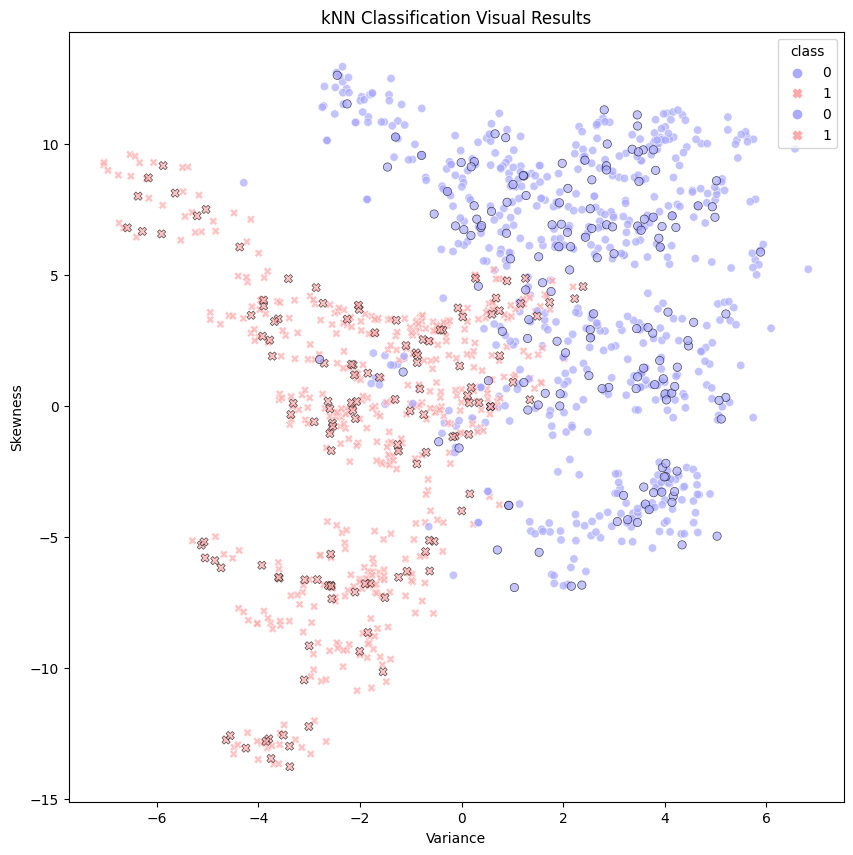

In [30]:
# Resetting the index of the test DataFrame to avoid index-related errors during plotting
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Start the plot
plt.figure(figsize=(10, 10))     # Set the figure size

# Both sets of datapoint use the same color palet (blue, white, red [bwr] here)
# Training data points have no edge color
sns.scatterplot(x=X_train['variance'], y=X_train['skewness'], 
                hue=y_train, style=y_train, palette='bwr',
                alpha=0.7, legend='brief')      # alpha sets the transparency level

# Test data points have black edge color
sns.scatterplot(x=X_test['variance'], y=X_test['skewness'], 
                hue=y_predicted, style=y_predicted, palette='bwr', edgecolor='black', 
                alpha=0.7, legend='brief')

plt.title('kNN Classification Visual Results')      # Set the title
plt.xlabel('Variance')                # Set the x-axis label
plt.ylabel('Skewness')          # Set the y-axis label
plt.legend(title='class')           # Set the legend title
plt.show()                # Show the plot


#### 1.3 List 2 interesting use cases for applying kNN algorithm for real world
#### *1.3.1 Use case 1: Money detection device*
We can apply the kNN algorithm to the money detection device with the result of our knn model. The device uses appropriate sensors to check the 'variance', 'skewness', 'curtosis', 'entropy' of a banknote and then classify it to belong to a 'class' of 1 or 0. Authenticity is defined by 0 or 1 (here we don't know which one is authentic but our job is to classify them as accurate as possible).
#### *1.3.2 Use case 2: Self-driving car*
Self-driving car uses various sensors, such as lidar, radar, and cameras, to perceive their surroundings and detect objects like pedestrians, other vehicles, and obstacles. The kNN algorithm can be applied to classify and track these objects in real-time. By identifying the nearest neighbors among previously observed objects, the car can anticipate the behavior of nearby objects and make safe driving decisions.

----------------------

### Part 2 Experimenting with the kNN algorithm more in detail
#### 2.1 Make experiments on the algorithms with different values of k. Here we keep the same test size = 0.2 (portion 80:20 for this run)
* *We will experiment with k = 37, 5, 7, 17, 57, and 99*  
* *...but change the random_state to be different than None for consistency, let's use random_state = 0 here*
* *Now we use k = 37*

In [31]:
# Test the classifier with different values of K to observe the performance of the classifier
# keep the test size 0.2 and random_state = 0
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)
# Now try with k = 37
k=37
knn=KNeighborsClassifier(k)
knn.fit(X_train, y_train)
y_predicted= knn.predict(X_test)
accuracy_score(y_test, y_predicted)

0.9963636363636363

* *Now we use k = 5*

In [32]:
# Test the classifier with different values of K to observe the performance of the classifier
# keep the test size 0.2 and random_state = 0
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)
# Now try with k = 5
k=5
knn=KNeighborsClassifier(k)
knn.fit(X_train, y_train)
y_predicted= knn.predict(X_test)
accuracy_score(y_test, y_predicted)

1.0

* *Now we use k = 7*

In [33]:
# Test the classifier with different values of K to observe the performance of the classifier
# keep the test size 0.2 and random_state = 0
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)
# Now try with k = 7
k=7
knn=KNeighborsClassifier(k)
knn.fit(X_train, y_train)
y_predicted= knn.predict(X_test)
accuracy_score(y_test, y_predicted)

1.0

* *Now we use k = 17*

In [34]:
# Test the classifier with different values of K to observe the performance of the classifier
# keep the test size 0.2 and random_state = 0
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)
# Now try with k = 17
k=17
knn=KNeighborsClassifier(k)
knn.fit(X_train, y_train)
y_predicted= knn.predict(X_test)
accuracy_score(y_test, y_predicted)

1.0

* *Now we use k = 57*

In [35]:
# Test the classifier with different values of K to observe the performance of the classifier
# keep the test size 0.2 and random_state = 0
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)
# Now try with k = 57
k=57
knn=KNeighborsClassifier(k)
knn.fit(X_train, y_train)
y_predicted= knn.predict(X_test)
accuracy_score(y_test, y_predicted)

0.9890909090909091

* *Now we use k = 99*

In [36]:
# Test the classifier with different values of K to observe the performance of the classifier
# keep the test size 0.2 and random_state = 0
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)
# Now try with k = 99
k=99
knn=KNeighborsClassifier(k)
knn.fit(X_train, y_train)
y_predicted= knn.predict(X_test)
accuracy_score(y_test, y_predicted)

0.9818181818181818

**We can see that the accuracy score changes with different values of k. But determining the best k for this classifier is not solely based on the accuracy score.**

#### 2.2 Study the effect of different training/testing split portions on your data (like 80/20 training/testing split)
* *Now we keep the k and other settings, just change the test_size. Let's use k = 37 again.*  
* *We will use the test size of 0.2, 0.1, 0.15, 0.25, and 0.3*
* *First, use the test size of 0.2*

In [37]:
# Test the classifier with different values of test_size to observe the performance of the classifier
# keep the k= 37 and random_state = 0
# use test_size of 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)
k=37
knn=KNeighborsClassifier(k)
knn.fit(X_train, y_train)
y_predicted= knn.predict(X_test)
accuracy_score(y_test, y_predicted)

0.9963636363636363

* *Now, use the test size of 0.1*

In [38]:
# Test the classifier with different values of test_size to observe the performance of the classifier
# keep the k= 37 and random_state = 0
# use test_size of 0.1
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = 0)
k=37
knn=KNeighborsClassifier(k)
knn.fit(X_train, y_train)
y_predicted= knn.predict(X_test)
accuracy_score(y_test, y_predicted)

1.0

* *Now, use the test size of 0.15*

In [39]:
# Test the classifier with different values of test_size to observe the performance of the classifier
# keep the k= 37 and random_state = 0
# use test_size of 0.15
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.15, shuffle = True, random_state = 0)
k=37
knn=KNeighborsClassifier(k)
knn.fit(X_train, y_train)
y_predicted= knn.predict(X_test)
accuracy_score(y_test, y_predicted)

1.0

* *Now, use the test size of 0.25*

In [40]:
# Test the classifier with different values of test_size to observe the performance of the classifier
# keep the k= 37 and random_state = 0
# use test_size of 0.25
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.25, shuffle = True, random_state = 0)
k=37
knn=KNeighborsClassifier(k)
knn.fit(X_train, y_train)
y_predicted= knn.predict(X_test)
accuracy_score(y_test, y_predicted)

0.9854227405247813

* *Now, use the test size of 0.3*

In [41]:
# Test the classifier with different values of test_size to observe the performance of the classifier
# keep the k= 37 and random_state = 0
# use test_size of 0.3
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 0)
k=37
knn=KNeighborsClassifier(k)
knn.fit(X_train, y_train)
y_predicted= knn.predict(X_test)
accuracy_score(y_test, y_predicted)

0.9878640776699029

**We can see that the accuracy score changes with different values of test_size. But determining the best k for this classifier is not solely based on the accuracy score.**

#### 2.3 Try k-Fold approach
* Cross-validation of the model using KFold

In [59]:
# Let the random_state != None, let's use 0 in the splitting and 1 in the KFold, so we can test different n_split, k, and test_size as needed.
n_splits= 9    # using 9
k = 35    # using another k value here
# test_size = 0.2 for this example
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)
kf = KFold(n_splits= n_splits, shuffle=True, random_state = 1)    # Call the K Fold function
cumulatedScore=0

for train_index, test_index in kf.split(X):    # Loop over (iterate ) the splits
    X_train = X.iloc[train_index, :]
    X_test = X.iloc[test_index, :]
    y_train = y.iloc[train_index] 
    y_test = y.iloc[test_index]  

    knn=KNeighborsClassifier(k)
    knn.fit(X_train, y_train)    # Fit the classifier
    y_predicted = knn.predict(X_test) ## Predict the test values
    cumulatedScore += accuracy_score(y_test, y_predicted)   # Accumulate the the accuracy scores

cumulatedScore/n_splits   # Print the average accuracy

0.9927091694377554